In [1]:
#1. Đọc dữ liệu và đưa vào dataframe data
library(readr)
data<-read_csv('mushroom.csv')

Rows: 8124 Columns: 24
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (22): Class, cap.shape, cap.surface, cap.color, odor, gill.attachment, g...
dbl  (1): X
lgl  (1): bruises

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [2]:
#2. In thông tin dữ liệu: head(), số dòng, số cột, summary…
head(data)
nrow(data)
ncol(data)
summary(data)

X,Class,cap.shape,cap.surface,cap.color,bruises,odor,gill.attachment,gill.spacing,gill.size,⋯,stalk.surface.below.ring,stalk.color.above.ring,stalk.color.below.ring,veil.type,veil.color,ring.number,ring.type,print,population,habitat
<dbl>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Poisonous,x,s,n,TRUE,None,f,c,n,⋯,s,w,w,p,w,o,p,Buff,s,u
2,Edible,x,s,y,TRUE,Almonds,f,c,b,⋯,s,w,w,p,w,o,p,Chocolate,n,g
3,Edible,b,s,w,TRUE,Fishy,f,c,b,⋯,s,w,w,p,w,o,p,Chocolate,n,m
4,Poisonous,x,y,w,TRUE,None,f,c,n,⋯,s,w,w,p,w,o,p,Buff,s,u
5,Edible,x,s,g,FALSE,Musty,f,w,b,⋯,s,w,w,p,w,o,e,Chocolate,a,g
6,Edible,x,y,y,TRUE,Almonds,f,c,b,⋯,s,w,w,p,w,o,p,Buff,n,g


[1] 8124

[1] 24

       X           Class            cap.shape         cap.surface       
 Min.   :   1   Length:8124        Length:8124        Length:8124       
 1st Qu.:2032   Class :character   Class :character   Class :character  
 Median :4062   Mode  :character   Mode  :character   Mode  :character  
 Mean   :4062                                                           
 3rd Qu.:6093                                                           
 Max.   :8124                                                           
  cap.color          bruises            odor           gill.attachment   
 Length:8124        Mode :logical   Length:8124        Length:8124       
 Class :character   FALSE:4748      Class :character   Class :character  
 Mode  :character   TRUE :3376      Mode  :character   Mode  :character  
                                                                         
                                                                         
                                             

In [3]:
data = subset(data, select = -c(X,veil.type) )

Installing package into 'C:/Users/ASUS/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'Amelia' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ASUS\AppData\Local\Temp\RtmpqYgMVK\downloaded_packages


Loading required package: Rcpp

## 
## Amelia II: Multiple Imputation
## (Version 1.8.1, built: 2022-11-18)
## Copyright (C) 2005-2022 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 

Warning message:
"Unknown or uninitialised column: `arguments`."
Warning message:
"Unknown or uninitialised column: `arguments`."
Warning message:
"Unknown or uninitialised column: `imputations`."


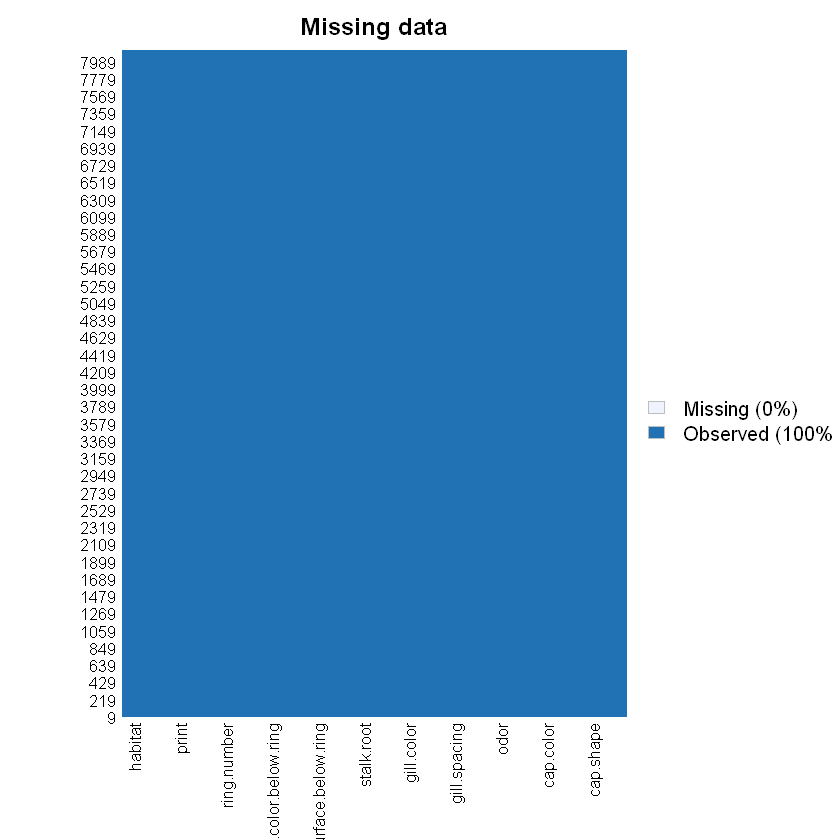

In [4]:
install.packages("Amelia")
library("Amelia")
missmap(data,main='Missing data')

In [5]:
data[sapply(data, is.character)] <- lapply(data[sapply(data, is.character)], 
                                       as.factor)

In [6]:
#4. Tạo train và test từ dữ liệu data.
n=nrow(data)
trainIndex=sample(1:n,size=round(0.7*n),replace=FALSE)
train=data[trainIndex,]
test=data[-trainIndex,]
print('rows of training and testing data')
print(nrow(train))
print(nrow(test))

[1] "rows of training and testing data"
[1] 5687
[1] 2437


In [7]:
#5. Xây dựng model với train
mylogit<-glm(Class~.,data=train,family='binomial')

Warning message:
"glm.fit: algorithm did not converge"


In [8]:
#6. In summary của model.
print(summary(mylogit))


Call:
glm(formula = Class ~ ., family = "binomial", data = train)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-2.409e-06  -2.409e-06  -2.409e-06   2.409e-06   2.409e-06  

Coefficients: (10 not defined because of singularities)
                            Estimate Std. Error z value Pr(>|z|)
(Intercept)               -2.657e+01  3.739e+05       0        1
cap.shapec                 2.854e-08  2.822e+05       0        1
cap.shapef                -2.049e-08  2.845e+04       0        1
cap.shapek                 7.737e-08  3.071e+04       0        1
cap.shapes                -1.815e-08  9.662e+04       0        1
cap.shapex                -1.587e-08  2.728e+04       0        1
cap.surfaceg              -4.730e-06  4.047e+05       0        1
cap.surfaces              -2.147e-08  1.596e+04       0        1
cap.surfacey               1.557e-08  1.341e+04       0        1
cap.colorc                 6.882e-08  9.199e+04       0        1
cap.colore       

In [9]:
#7. Dự đoán y_pred từ test => so sánh với y_test.
pred=predict(mylogit,newdata=test,type='response')
pred_value<-ifelse(pred>0.5,'Poisonous','Edible')
print('testdata admit vs predict 10rows')
result<-data.frame(testAdmit=test$Class[30:40],pred_value[30:40])
print(result)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"


[1] "testdata admit vs predict 10rows"
   testAdmit pred_value.30.40.
30    Edible            Edible
31    Edible            Edible
32    Edible            Edible
33    Edible            Edible
34    Edible            Edible
35    Edible            Edible
36    Edible            Edible
37    Edible            Edible
38 Poisonous         Poisonous
39    Edible            Edible
40    Edible            Edible


In [10]:
#8. Đánh giá model.
install.packages('caret')
library('caret')
confusionMatrix(as.factor(pred_value),as.factor(test$Class))

Installing package into 'C:/Users/ASUS/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'caret' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ASUS\AppData\Local\Temp\RtmpqYgMVK\downloaded_packages


Loading required package: ggplot2

Loading required package: lattice



Confusion Matrix and Statistics

           Reference
Prediction  Edible Poisonous
  Edible      1247         0
  Poisonous      0      1190
                                     
               Accuracy : 1          
                 95% CI : (0.9985, 1)
    No Information Rate : 0.5117     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.5117     
         Detection Rate : 0.5117     
   Detection Prevalence : 0.5117     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : Edible     
                                     

In [11]:
#decision tree
library(rpart)
data.tree<-rpart(Class~.,data=train,method='class',minbucket=1)

In [12]:
print(summary(data.tree))

Call:
rpart(formula = Class ~ ., data = train, method = "class", minbucket = 1)
  n= 5687 

          CP nsplit  rel error     xerror        xstd
1 0.96845194      0 1.00000000 1.00000000 0.013820211
2 0.01797506      1 0.03154806 0.03154806 0.003376094
3 0.01000000      2 0.01357300 0.01357300 0.002224117

Variable importance
                    odor                    print               gill.color 
                      25                       19                       16 
stalk.surface.above.ring                ring.type stalk.surface.below.ring 
                      14                       13                       13 

Node number 1: 5687 observations,    complexity param=0.9684519
  predicted class=Edible     expected loss=0.4793388  P(node) =1
    class counts:  2961  2726
   probabilities: 0.521 0.479 
  left son=2 (3047 obs) right son=3 (2640 obs)
  Primary splits:
      odor                     splits as  LRRLRLRRR,    improve=2671.4990, (0 missing)
      print             

In [19]:
pred_new=predict(data.tree,test,type='class')
print('testdata admit vs predict 10rows')
result<-data.frame(testAdmit=test$Class[30:40],pred_new[30:40])
print(result)

[1] "testdata admit vs predict 10rows"
   testAdmit pred_new.30.40.
30    Edible          Edible
31    Edible          Edible
32    Edible          Edible
33    Edible          Edible
34    Edible          Edible
35    Edible          Edible
36    Edible          Edible
37    Edible          Edible
38 Poisonous       Poisonous
39    Edible          Edible
40    Edible          Edible


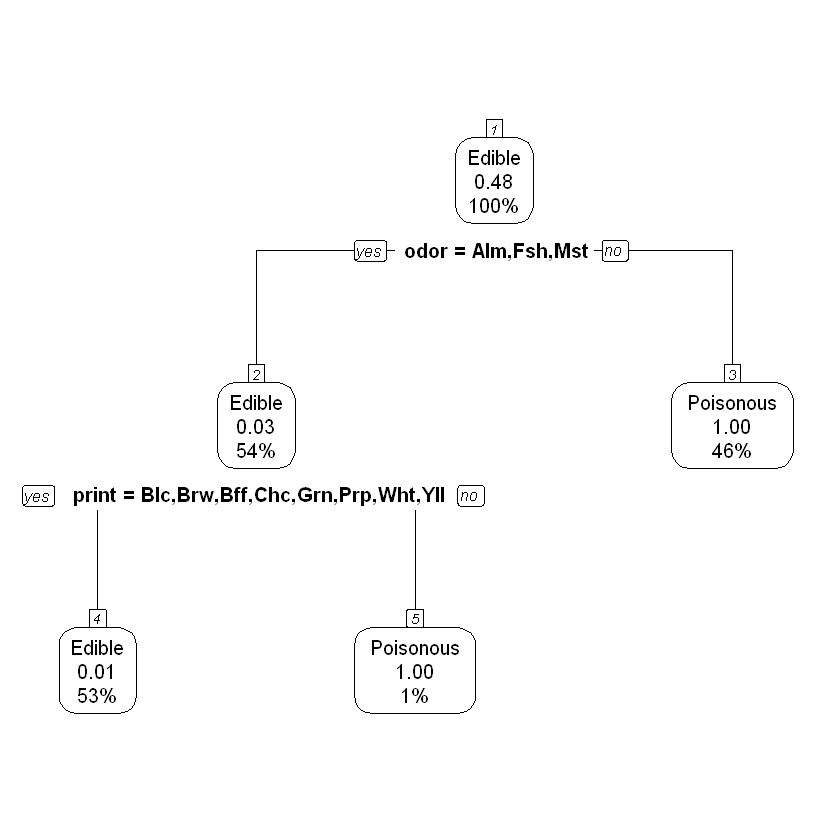

In [14]:
library(rpart.plot)
prp(data.tree,type=2,extra='auto',nn=TRUE,branch=1,varlen=0,yesno=2)

In [21]:
confusionMatrix(as.factor(pred_new),as.factor(test$Class))

Confusion Matrix and Statistics

           Reference
Prediction  Edible Poisonous
  Edible      1247        11
  Poisonous      0      1179
                                          
               Accuracy : 0.9955          
                 95% CI : (0.9919, 0.9977)
    No Information Rate : 0.5117          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.991           
                                          
 Mcnemar's Test P-Value : 0.002569        
                                          
            Sensitivity : 1.0000          
            Specificity : 0.9908          
         Pos Pred Value : 0.9913          
         Neg Pred Value : 1.0000          
             Prevalence : 0.5117          
         Detection Rate : 0.5117          
   Detection Prevalence : 0.5162          
      Balanced Accuracy : 0.9954          
                                          
       'Positive' Class : Edible          

logistic regression có vẻ phù hợp với dữ liệu hơn vì cho độ chính xác cao hơn